In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

from models import *
from data_split import *

## Data Loading

In [25]:
data = pickle.load(open(r'../Data/deltaQ_cycles.pkl', 'rb'))
data2 = pickle.load(open(r'../Data/temp_features.pkl', 'rb'))

In [34]:
n_cycles = 49
cut_start = 1

features = [
    "DeltaQ_logVars",
    # "DeltaQ_mins",
    # "DeltaQ_means",
    "Delta_Tmax",
    # "DeltaT_var",
]

length = n_cycles - cut_start
y = np.zeros(124)
x = np.zeros((124, length*len(features)))

for i, cell in enumerate(data.keys()):
    for j, feature in enumerate(features):
        if feature in list(data["b1c0"].keys()): 
            x[i, j*length:(j+1)*length] = data[cell][feature][cut_start:]
        else: 
            x[i, j*length:(j+1)*length] = data2[cell][feature][cut_start:]
    y[i] = np.log10(data[cell]["cycle_life"])

# convert to tensors and concatenate features and labels
x = torch.Tensor(x)
y = torch.Tensor(y)

## Autoencoder multi-stage training


Stage 1:

Epoch 300/3000, loss: 3479.08
Epoch 600/3000, loss: 2473.13
Epoch 900/3000, loss: 1688.26
Epoch 1200/3000, loss: 1122.05
Epoch 1500/3000, loss: 799.03
Epoch 1800/3000, loss: 667.87
Epoch 2100/3000, loss: 597.29
Epoch 2400/3000, loss: 535.97
Epoch 2700/3000, loss: 478.33
Epoch 3000/3000, loss: 419.25
train 	 63.84549
test 	 124.55093
sec 	 328.0513


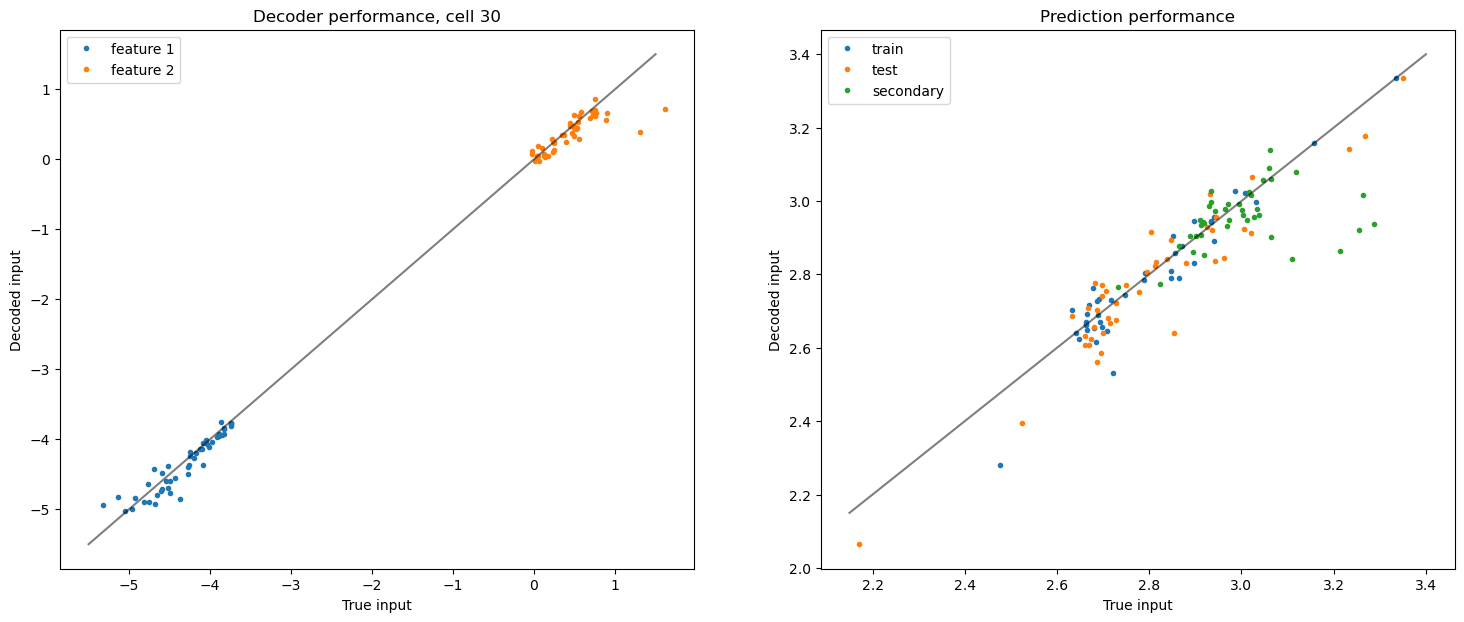


Stage 2:

Epoch 100/1000, loss: 1.51
Epoch 200/1000, loss: 1.47
Epoch 300/1000, loss: 1.42
Epoch 400/1000, loss: 1.38
Epoch 500/1000, loss: 1.34
Epoch 600/1000, loss: 1.31
Epoch 700/1000, loss: 1.27
Epoch 800/1000, loss: 1.24
Epoch 900/1000, loss: 1.20
Epoch 1000/1000, loss: 1.17
train 	 46.43788
test 	 133.68936
sec 	 327.5338


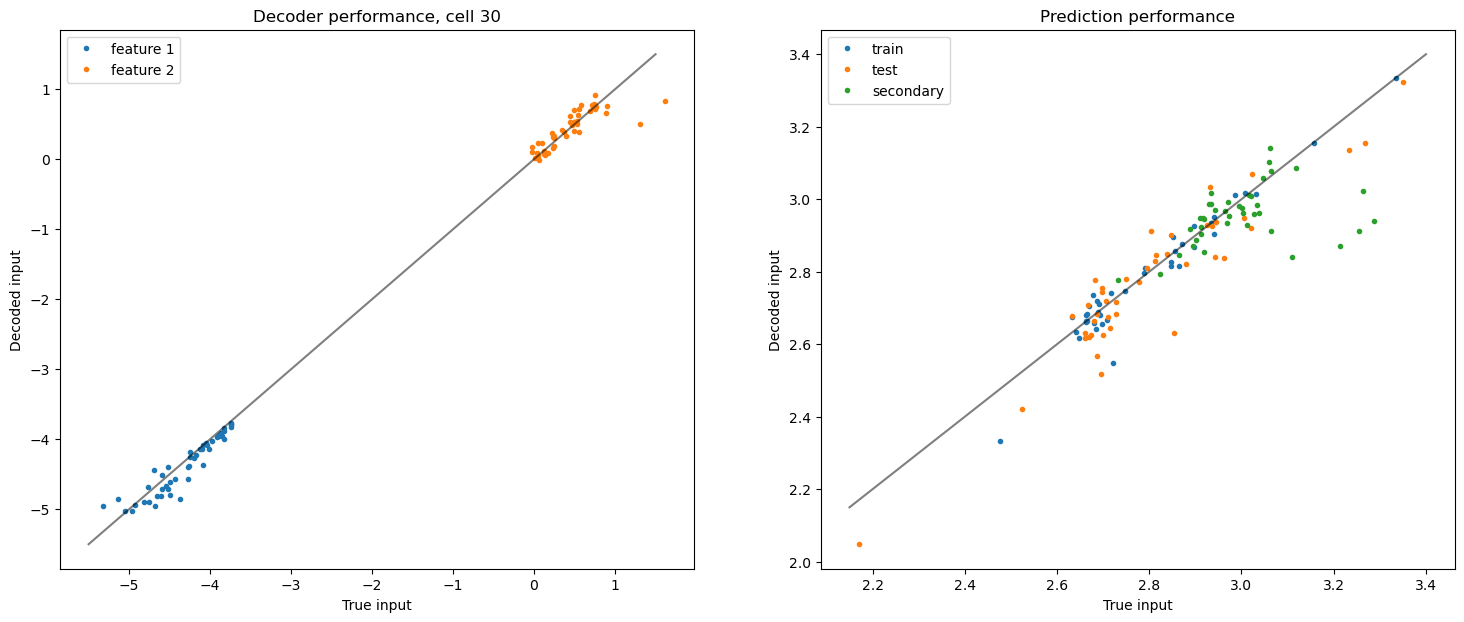

In [35]:
# del model

train_policy = {
    "num_stages": 2,
    "epochs": [3000, 1000],
    "learning_rates": [3e-5, 1e-5],
    "batch_sizes": [64, 64],
    "prediction_weights": [0.1, 0.0001],
    "decoding_weights": [10, 1],
    "en_weights": [1, 1]
}


model = AutoEncoder_ElasticNet(n_features=len(features), n_cycles=48)
# model.fit(train_dataset, decoding_weight=10)
# model.fit(train_dataset, prediction_weight=0.0001, decoding_weight=1, lr = 1e-5, epochs=1000)
model.fit(x, y, train_policy)

## Decoder performance on other cells

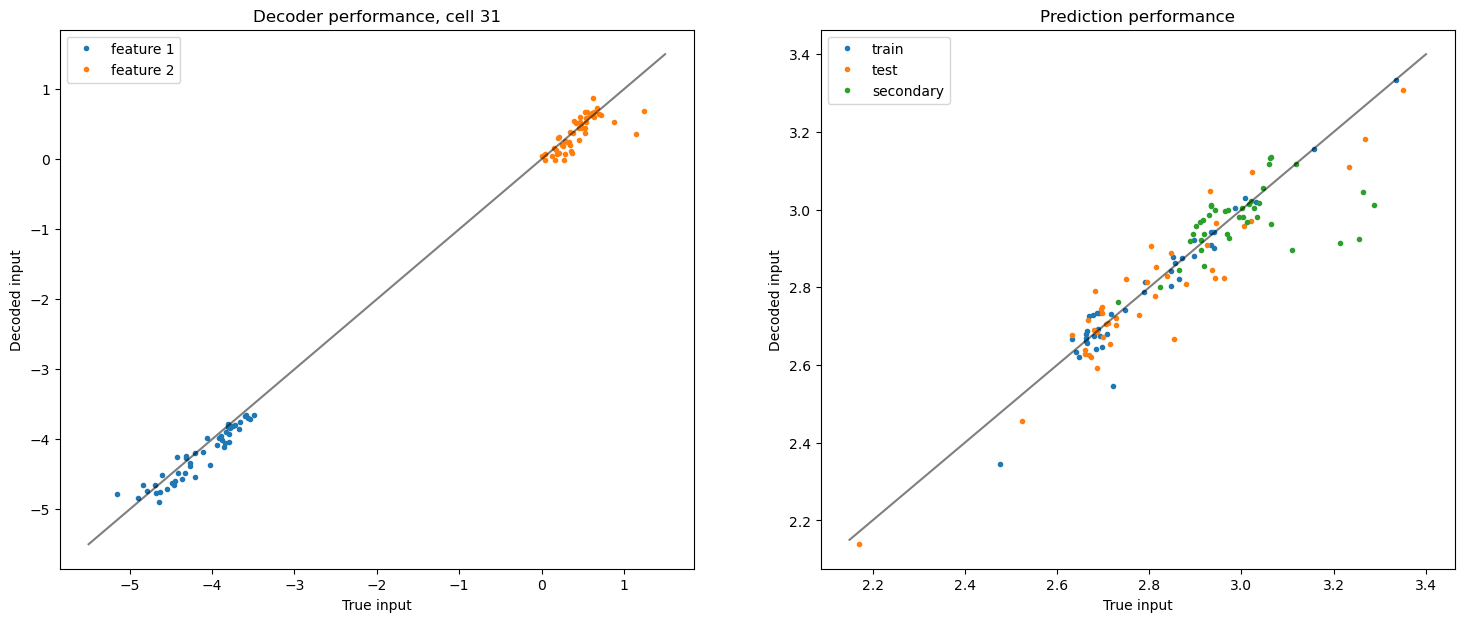

In [10]:
model.plotter(x, y, 31)